In [57]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet as pt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set_style('whitegrid')
plt.style.use("default")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()
from tensorflow.keras.models import load_model

df = pd.DataFrame(listing_companies())\
search_word = 'mobile'\
result = df[df['organName'].str.contains(search_word)]\
print(result)

Vin = VIC\
Viettel = VGI\
FPT = FPT\
thế giới di động = MWG\
Petrolimex = PLC

In [58]:
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime(2023, 1, 1)
df = pdr.get_data_yahoo('AAPL', start_date, end_date)
display(df.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117435,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022629,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065748,458707200


# TURTLE AGENT

In [59]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
Date,,,,
2013-01-02,0.0,19.608213,NaN,NaN
2013-01-03,0.0,19.360714,NaN,NaN
2013-01-04,0.0,18.821428,NaN,NaN
2013-01-07,0.0,18.710714,NaN,NaN
2013-01-08,0.0,18.761070,NaN,NaN
...,...,...,...,...
2022-12-23,0.0,131.860001,182.009995,130.059998
2022-12-27,1.0,130.029999,182.009995,130.059998
2022-12-28,1.0,126.040001,182.009995,130.029999


In [60]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [61]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 330: cannot sell anything, inventory 0
day 331: cannot sell anything, inventory 0
day 336: cannot sell anything, inventory 0
day 346: cannot sell anything, inventory 0
day 347: cannot sell anything, inventory 0
day 348: cannot sell anything, inventory 0
day 349: cannot sell anything, inventory 0
day 350: cannot sell anything, inventory 0
day 351: cannot sell anything, inventory 0
day 353: cannot sell anything, inventory 0
day 356: cannot sell anything, inventory 0
day 357: cannot sell anything, inventory 0
day 358: cannot sell anything, inventory 0
day 360: cannot sell anything, inventory 0
day 361: cannot sell anything, inventory 0
day 379: cannot sell anything, inventory 0
day 384: cannot sell anything, inventory 0
day 391: cannot sell anything, inventory 0
day 393: cannot sell anything, inventory 0
day 394: cannot sell anything, inventory 0
day 409: cannot sell anything, inventory 0
day 410: cannot sell anything, inventory 0
day 411: cannot sell anything, inventory 0
day 412: ca

C:\Users\lehun\AppData\Local\Temp\ipykernel_10708\704551773.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state = signal[i]
C:\Users\lehun\AppData\Local\Temp\ipykernel_10708\704551773.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares = initial_money // real_movement[i]
C:\Users\lehun\AppData\Local\Temp\ipykernel_10708\704551773.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_money -= buy_units * real_mo

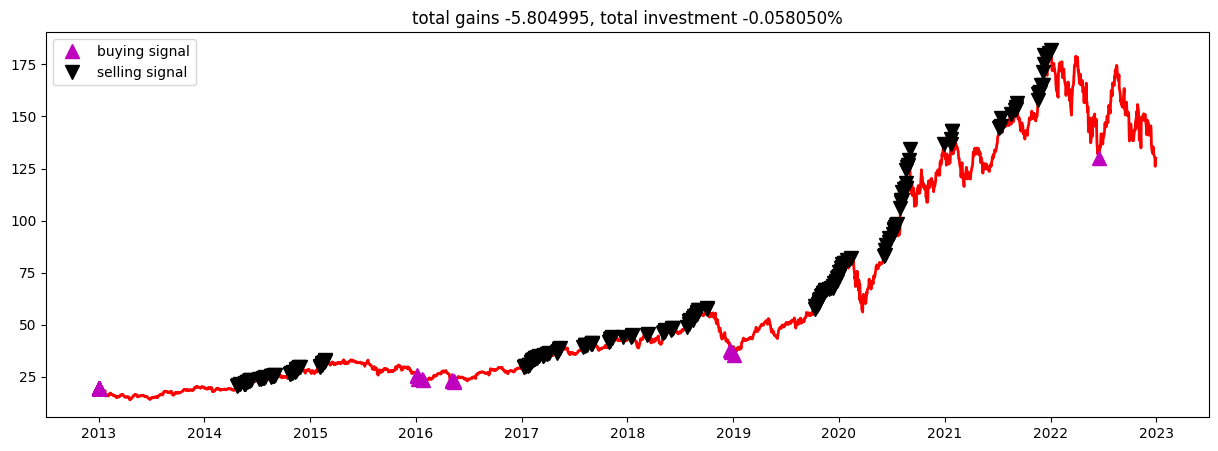

In [62]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

# LSTM MODEL

In [63]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [64]:
def load_data(company, start, end):
    """
    Load data for the specified company and date range.

    :param company: The company's stock symbol (str)
    :param start: The starting date for the data range (str or datetime)
    :param end: The ending date for the data range (str or datetime)
    :return: A dataframe containing the relevant stock data (pandas.DataFrame)
    """
    # Create a Ticker object for the specified company
    ticker = yf.Ticker(company)
    
    # Download historical data for the specified date range
    df = ticker.history(start=start, end=end)
    
    # Rename the 'Close' column to match your original DataFrame
    df.rename(columns={'Close': 'Close'}, inplace=True)
    
    return df

In [65]:
COMPANY = 'AAPL'
START_DATE_TEST = end_date

In [66]:
data = load_data(company = COMPANY,
                 start = start_date,
                 end = end_date)

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [68]:
# Set the number of days used for prediction
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [69]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [70]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [71]:
# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5', 
    verbose = 2, 
    save_best_only = True
)

model.fit(
    x_train, 
    y_train, 
    epochs=25, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
77/77 [==============================] - 14s 89ms/step - loss: 0.0150
Epoch 2/25
77/77 [==============================] - 6s 75ms/step - loss: 0.0025
Epoch 3/25
77/77 [==============================] - 7s 86ms/step - loss: 0.0023
Epoch 4/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0020
Epoch 5/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0019
Epoch 6/25
77/77 [==============================] - 6s 78ms/step - loss: 0.0018
Epoch 7/25
77/77 [==============================] - 6s 76ms/step - loss: 0.0017
Epoch 8/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0017
Epoch 9/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0016
Epoch 10/25
77/77 [==============================] - 6s 78ms/step - loss: 0.0018
Epoch 11/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0018
Epoch 12/25
77/77 [==============================] - 6s 77ms/step - loss: 0.0017
Epoch 13/25
77/77 [=================

In [72]:
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,
    end=dt.datetime.now()
)

# Extract the actual closing prices from the test data
actual_prices = test_data['Close'].values

# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)

In [73]:
# Initialize an empty list for test data input
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

# Convert the x_test list to a numpy array
x_test = np.array(x_test)

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

6/6 [==============================] - 1s 28ms/step


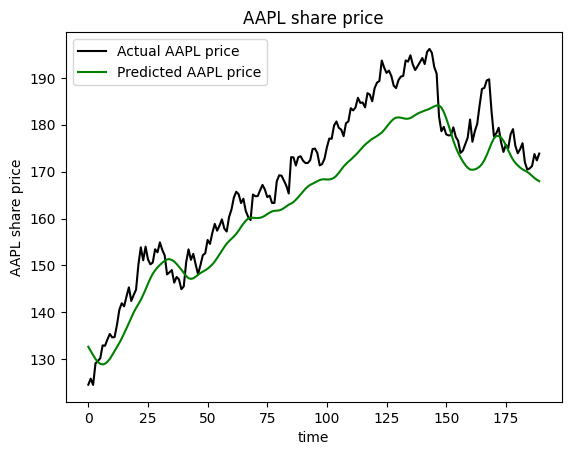

In [74]:
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title(f"{COMPANY} share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()

In [75]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
Prediction: 167.8024444580078


In [76]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 6.180912298905222
Root Mean Squared Error (RMSE): 7.177863961999138


# ARIMA MODEL